### Etapa 1
Análise exploratória dos dados
Dataset: Medical Text Dataset - Cancer Doc 
Alunos: Adson Borges, Victor Fidelis

Instalação de algumas bibliotecas utilizadas posteriormentes

In [1]:
#pip install WordCloud
#!pip install seaborn

Importação das bibliotecas utilizadas e a referenciação do arquivo do dataset Cancer Doc Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from tqdm import trange

df=pd.read_csv('CancerDocClassification.csv', encoding='latin1')
df = df.iloc[:,1:3]
df.columns=['labels','text']
df.head()


,labels,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


Contagem das classes

In [3]:
df['labels'].value_counts()

labels
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

Codificação das classes

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])
df.head()

,labels,text
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


Contagem das células vazias

In [5]:
df.isnull().sum()

labels    0
text      0
dtype: int64

Contagem da quantidade de linhas que se repetem 

In [6]:
df.duplicated().sum()

6574

Descarte desses textos 

In [7]:
df = df.drop_duplicates(keep='first')
df= df.reset_index(drop=True)
df.duplicated().sum()



0

Verificar o formato do dataset com retirada dos textos duplicados

In [8]:
df.shape

(996, 2)

Recontagem das classes

In [9]:
tmp = df['labels'].value_counts()
tmp

labels
1    452
2    283
0    261
Name: count, dtype: int64

Plotar gráfico de barras referente à quantidade de textos por classes

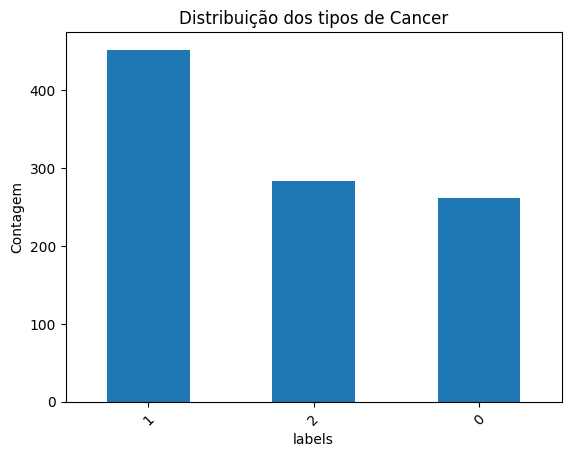

In [10]:
tmp.plot(kind='bar')
plt.ylabel('Contagem')
plt.title('Distribuição dos tipos de Cancer')
plt.xticks(rotation=45)
plt.show()

Transformar todos caracteres em minúsculo e remover sinais de pontuação

In [11]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','', string.punctuation))
    return text

df['text'] = df['text'].apply(clean_text)

print(df)


     labels                                               text
0         2  thyroid surgery in  children in a single insti...
1         2   the adopted strategy was the same as that use...
2         2  coronary arterybypass grafting thrombosis ï¬b...
3         2   solitary plasmacytoma sp of the skull is an u...
4         2   this study aimed to investigate serum matrix ...
..      ...                                                ...
991       1  missense mutation distribution in the exons an...
992       1  versus gemcitabinecarboplatin in advanced nons...
993       2   keloids are pathological scars that grow over...
994       0  the anization of cells into multiple membranou...
995       0  several immunotherapeutic strategies that harn...

[996 rows x 2 columns]


instalação algumas bibliotecas e recursos que serão utilizados

In [12]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

Tokenização, removeção de stopwords e lemmatização dos textos 

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stop_words.add("\x93")
stop_words.add("et")
stop_words.add("al")
stop_words.add("a0al")

lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    words = word_tokenize(text)  # Tokenizar o texto
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remover stopwords
    lemmatized_words = [lemmatizer.lemmatize(words) for words in filtered_words]  # Lemmatizar
    return lemmatized_words

# Aplicar a função ao DataFrame
df['tokens'] = df['text'].apply(preprocess_text)

print(df)

     labels                                               text  \
0         2  thyroid surgery in  children in a single insti...   
1         2   the adopted strategy was the same as that use...   
2         2  coronary arterybypass grafting thrombosis ï¬b...   
3         2   solitary plasmacytoma sp of the skull is an u...   
4         2   this study aimed to investigate serum matrix ...   
..      ...                                                ...   
991       1  missense mutation distribution in the exons an...   
992       1  versus gemcitabinecarboplatin in advanced nons...   
993       2   keloids are pathological scars that grow over...   
994       0  the anization of cells into multiple membranou...   
995       0  several immunotherapeutic strategies that harn...   

                                                tokens  
0    [thyroid, surgery, child, single, institution,...  
1    [adopted, strategy, used, prior, year, based, ...  
2    [coronary, arterybypass, grafti

Contagem de palavras, bigramas e trigramas

In [14]:
from nltk.tokenize.treebank import TreebankWordDetokenizer


def detoken(text):
    word = TreebankWordDetokenizer().detokenize(text)
    return word

def corpus(text):
    text_list = text.split()
    return text_list

df['tokens'] = df['tokens'].apply(detoken)
df['text_list'] = df['tokens'].apply(corpus)
df.head()

corpus = []
for i in trange(df.shape[0], ncols = 150, nrows = 10, colour = 'green', smoothing = 0.8):
    corpus += df['text_list'][i]
len(corpus)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 7793.22it/s]


2118551

In [15]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('cell', 25347),
 ('cancer', 19807),
 ('patient', 16727),
 ('study', 12300),
 ('expression', 9739),
 ('tumor', 8822),
 ('gene', 8153),
 ('lung', 7850),
 ('analysis', 6765),
 ('data', 6720)]

In [16]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

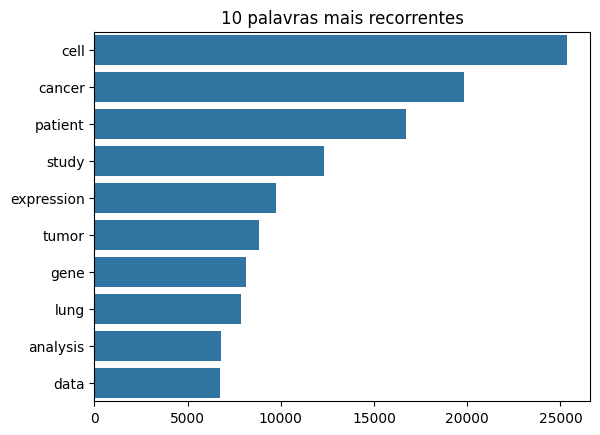

In [17]:
sns.barplot(x=freq, y=words)
plt.title('10 palavras mais recorrentes')
plt.show()

In [18]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['tokens'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('10 bigramas mais recorrentes')
plt.show()


MemoryError: Unable to allocate 7.43 GiB for an array with shape (996, 1001298) and data type int64

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['tokens'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('10 trigramas mais recorrentes')
plt.show()

MemoryError: Unable to allocate 10.4 GiB for an array with shape (996, 1407532) and data type int64

### Naive Bayes

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['labels'], test_size=0.2, random_state=42)

# Converter os textos em vetores TF-IDF
vectorizer = TfidfVectorizer(stop_words= list(stop_words), max_df=0.02)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Treinar o modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb_classifier.predict(X_test_tfidf)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Precisão média ponderada (considera o desbalanceamento de classes)
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão (Weighted): {precision * 100:.2f}%')

# Recall médio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall (Weighted): {recall * 100:.2f}%')

# F1-score médio ponderado
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score (Weighted): {f1 * 100:.2f}%')

# Relatório de Classificação Completo
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 52.00%
Precisão (Weighted): 45.79%
Recall (Weighted): 52.00%
F1-Score (Weighted): 42.57%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.33      0.09      0.14        55
           1       0.55      1.00      0.71        89
           2       0.43      0.18      0.25        56

    accuracy                           0.52       200
   macro avg       0.44      0.42      0.37       200
weighted avg       0.46      0.52      0.43       200



### Bi-LSTM

In [ ]:
#pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Bi-LSTM

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

# Tokenização dos textos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tokens'])
sequences = tokenizer.texts_to_sequences(df['tokens'])

# Padronizar o comprimento das sequências
max_sequence_length = 200
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Codificar as labels
encoder = LabelBinarizer()
y = encoder.fit_transform(df['labels'])

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=300, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - accuracy: 0.2807 - loss: 1.0986
Loss: 1.0986, Accuracy: 0.2676


In [68]:
pip install transformers datasets torch


     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.7 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.7 kB ? eta -:--:--
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     ------------------ -------------------- 20.5/43.7 kB 54.8 kB/s eta 0:00:01
     

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adson\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read

In [67]:
from transformers import LlamaForSequenceClassification, LlamaTokenizer, Trainer, TrainingArguments
import torch

# Tokenizar o dataset
tokenizer = LlamaTokenizer.from_pretrained("meta-llama/Llama-2-7b")

def tokenize_function(examples):
    return tokenizer(examples['texto'], truncation=True, padding='max_length', max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Dividir o dataset em treino e teste
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Carregar o modelo pré-treinado
model = LlamaForSequenceClassification.from_pretrained("meta-llama/Llama-2-7b", num_labels=len(df['label'].unique()))

# Configurar os argumentos de treinamento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Definir o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Treinar o modelo
trainer.train()

# Avaliar o modelo
results = trainer.evaluate()
print(results)

ModuleNotFoundError: No module named 'transformers'